# Introduction

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, you will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.

After you complete your visualizations, you'll be creating a presentation to share the images with the rest of the Netflix Stock Profile team. Your slides should include:

- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Step 1

Let's get our notebook ready for visualizing! Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

Let's load the datasets and inspect them.

Load **NFLX.csv** into a DataFrame called `netflix_stocks`. Then, quickly inspect the DataFrame using `print()`.

Hint: Use the `pd.read_csv()`function).

Note: In the Yahoo Data, `Adj Close` represents the adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day.

In [2]:
netflix_stocks = pd.read_csv('NFLX.csv')

Load **DJI.csv** into a DataFrame called `dowjones_stocks`. Then, quickly inspect the DataFrame using `print()`.

Note: You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 


In [3]:
dowjones_stocks = pd.read_csv('DJI.csv')

Load **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`. Then, quickly inspect the DataFrame using `print()`.


In [4]:
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')

## Step 3

Let's learn more about our data. The datasets are large and it may be easier to view the entire dataset locally on your computer. Open the CSV files directly from the folder you downloaded for this project.
 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 
 
Answer the following questions by inspecting the data in the **NFLX.csv**,**DJI.csv**, and **NFLX_daily_by_quarter.csv** in your computer.

What year is represented in the data? Look out for the latest and earliest date.

In [5]:
'''Netflix stocks year'''
print('Netflix stocks starting and ending')
print(netflix_stocks['Date'].iloc[0])
print(netflix_stocks['Date'].iloc[-1])

print('------')

'''Dowjones stocks year'''
print('Dowjones stocks starting and ending')
print(dowjones_stocks['Date'].iloc[0])
print(dowjones_stocks['Date'].iloc[-1])

print('------')

'''netflix_stocks_quarterly year'''
print('Netflix Stocks quarterly starting and ending')
print(netflix_stocks_quarterly['Date'].iloc[0])
print(netflix_stocks_quarterly['Date'].iloc[-1])

#### What year is represented in the data? ####
'''There are data for year 2017'''


Netflix stocks starting and ending
2017-01-01
2017-12-01
------
Dowjones stocks starting and ending
2017-01-01
2017-12-01
------
Netflix Stocks quarterly starting and ending
2017-01-03
2017-12-29


'There are data for year 2017'

+ Is the data represented by days, weeks, or months? 
+ In which ways are the files different? 
+ What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [6]:
##### Is the data represented by days, weeks, or months? ####
print('Is the data represented by days, weeks, or months?')
print('Type of data')
print(type(netflix_stocks['Date'].loc[0]))
print(type(netflix_stocks_quarterly['Date'].loc[0]))
print(type(netflix_stocks['Date'].loc[0]))
print("Based on evaluation above, each dataset is represented by column 'Date'.",
      "Each cell of this column is a string indicating the date format YYYY-MM-DD.")


Is the data represented by days, weeks, or months?
Type of data
<class 'str'>
<class 'str'>
<class 'str'>
Based on evaluation above, each dataset is represented by column 'Date'. Each cell of this column is a string indicating the date format YYYY-MM-DD.


In [7]:
#### In which ways are the files different? ####
print('In which ways are the files different?')

print('Lenght of datasets:')
print("Netflix_stock data: {}".format(len(netflix_stocks)))
print("Dowjones_stock data: {}".format(len(dowjones_stocks)))
print("Netflix_stock_quarterly data: {}".format(len(netflix_stocks_quarterly)))
print()
print("Each file has same the same amount of 7 columns. The only exception is,",
"netflix_stocks_quarterly data where the additional 'Quarter' column is present.",
"Data for netflix and dow jones stocks are represented on monthly basis.",
"Length of netflix stocks quarterly data is 251 indicating that there are data",
"for each day of the year excluding weekends and holidays.")

In which ways are the files different?
Lenght of datasets:
Netflix_stock data: 12
Dowjones_stock data: 12
Netflix_stock_quarterly data: 251

Each file has same the same amount of 7 columns. The only exception is, netflix_stocks_quarterly data where the additional 'Quarter' column is present. Data for netflix and dow jones stocks are represented on monthly basis. Length of netflix stocks quarterly data is 251 indicating that there are data for each day of the year excluding weekends and holidays.


In [8]:
#### What's different about the columns for netflix_stocks versus netflix_stocks_quarterly? ####
print("What's different about the columns for netflix_stocks versus netflix_stocks_quarterly?")
print()
print("As it was mentioned above, data in netflix_stocks dataset is represented monthly",
"whereas the data in netflix_stocks_quarterly is represented daily.",
"Each datasets are examined further - data for a whole month (February) from netflix_stocks_quarterly",
"are compared to a February record in netflix_stocks dataset")
print()
print('Difference between netflix_stocks and netflix_stocks_quarterly')
# Results for February from netflix_stocks are printed
to_compare_netflix = list(netflix_stocks.loc[1])
print('From Netflix_stocks (Feb): {}'.format(to_compare_netflix))
print('-----------')

# Data for February from netflix_stocks_quarterly are selected
# 'Date' strings are converted to datetime format 
netflix_stocks_quarterly['DateTime'] = pd.to_datetime(netflix_stocks_quarterly['Date'])
# Month February is selected
df_with_DateTime = netflix_stocks_quarterly.loc[(netflix_stocks_quarterly['DateTime'].dt.month==2)]
# Data from netflix_stocks_quarterly are extrapolated 
to_compare_netflix_q = [df_with_DateTime['Date'].iloc[0]] # Date
to_compare_netflix_q.append(df_with_DateTime['Open'].iloc[0]) # Open
to_compare_netflix_q.append(df_with_DateTime['High'].max()) # High
to_compare_netflix_q.append(df_with_DateTime['Low'].min()) # Low
to_compare_netflix_q.append(df_with_DateTime['Close'].iloc[-1]) # Close
to_compare_netflix_q.append(df_with_DateTime['Adj Close'].iloc[-1]) # Adj Close
to_compare_netflix_q.append(df_with_DateTime['Volume'].sum()) # Volume
print('From Netflix_stocks_quarterly (Feb): {}'.format(to_compare_netflix_q))
print()
print("As seen from the results each line in netflix_stocks represents compressed data from", 
"netflix_stocks_quarterly for a whole month.")

What's different about the columns for netflix_stocks versus netflix_stocks_quarterly?

As it was mentioned above, data in netflix_stocks dataset is represented monthly whereas the data in netflix_stocks_quarterly is represented daily. Each datasets are examined further - data for a whole month (February) from netflix_stocks_quarterly are compared to a February record in netflix_stocks dataset

Difference between netflix_stocks and netflix_stocks_quarterly
From Netflix_stocks (Feb): ['2017-02-01', 141.199997, 145.949997, 139.050003, 142.130005, 142.130005, 91432000]
-----------
From Netflix_stocks_quarterly (Feb): ['2017-02-01', 141.199997, 145.949997, 139.050003, 142.130005, 142.130005, 91432000]

As seen from the results each line in netflix_stocks represents compressed data from netflix_stocks_quarterly for a whole month.


## Step 4

Great! Now that we have spent sometime looking at the data, let's look at the column names of the DataFrame `netflix_stocks` using `.head()`. 

In [9]:
print(netflix_stocks.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


What do you notice? The first two column names are one word each, and the only one that is not is `Adj Close`! 

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Use Pandas to change the name of of the column to `Adj Close` to `Price` so that it is easier to work with the data. Remember to use `inplace=True`.

Do this for the Dow Jones and Netflix Quarterly pandas dataframes as well.
Hint: Use [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)).


In [10]:
netflix_stocks = netflix_stocks.rename(columns={"Adj Close": "Price"})
dowjones_stocks = dowjones_stocks.rename(columns={"Adj Close": "Price"})
netflix_stocks_quarterly = netflix_stocks_quarterly.rename(columns={"Adj Close": "Price"})

Run `netflix_stocks.head()` again to check your column name has changed.

In [11]:
print(netflix_stocks.head())

         Date        Open        High         Low       Close       Price  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


Call `.head()` on the DataFrame `dowjones_stocks` and `netflix_stocks_quarterly`.

In [12]:
print(dowjones_stocks.head())

print(netflix_stocks_quarterly.head())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

          Price      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000  
         Date        Open        High         Low       Close       Price  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007

## Step 5

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter!


1. Start by creating a variable `ax` and setting it equal to `sns.violinplot()`. This will instantiate a figure and give us access to the axes through the variable name `ax`.
2. Use `sns.violinplot()` and pass in the following arguments:
+ The `Quarter` column as the `x` values
+ The `Price` column as your `y` values
+ The `netflix_stocks_quarterly` dataframe as your `data`
3. Improve the readability of the chart by adding a title of the plot. Add `"Distribution of 2017 Netflix Stock Prices by Quarter"` by using `ax.set_title()`
4. Change your `ylabel` to "Closing Stock Price"
5. Change your `xlabel` to "Business Quarters in 2017"
6. Be sure to show your plot!


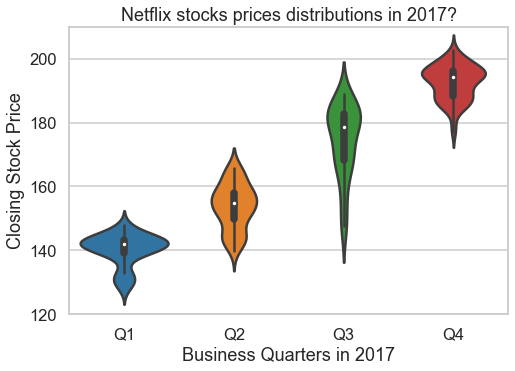

In [13]:
#### Setting style ####
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

#### Violin plot ####
fig1 = plt.figure(figsize=(7.5,5.5))
ax = sns.violinplot(data=netflix_stocks_quarterly, x="Quarter", y="Price")
ax.set_title("Netflix stocks prices distributions in 2017?")
ax.set_xlabel("Business Quarters in 2017")
ax.set_ylabel("Closing Stock Price")
ax.set_ylim([120, 210])
fig1.tight_layout()
plt.show()


## Graph Literacy
- What are your first impressions looking at the visualized data?

- In what range(s) did most of the prices fall throughout the year?

- What were the highest and lowest prices? 

In [14]:
#### What are your first impressions looking at the visualized data? ####
print('What are your first impressions looking at the visualized data?')
print('First thing to notice is that the Adj prices are constantly rising through the year.',
      'Another thing that imidiately draw my attention is this huge span of 95 % confidence interval',
      'in for 3rd quarter of 2017 indicating a rather huge changes in stock price.')

What are your first impressions looking at the visualized data?
First thing to notice is that the Adj prices are constantly rising through the year. Another thing that imidiately draw my attention is this huge span of 95 % confidence interval in for 3rd quarter of 2017 indicating a rather huge changes in stock price.


In [15]:
#### In what range(s) did most of the prices fall throughout the year? ####
print('In what range(s) did most of the prices fall throughout the year?')

print('95 % confidence interval in seaborn is calculated via function ci which can be found in seaborn/utils.py')
print()
# Select data for each quarter
quarter_1 = netflix_stocks_quarterly['Price'].loc[netflix_stocks_quarterly['Quarter'] == 'Q1']
quarter_2 = netflix_stocks_quarterly['Price'].loc[netflix_stocks_quarterly['Quarter'] == 'Q2']
quarter_3 = netflix_stocks_quarterly['Price'].loc[netflix_stocks_quarterly['Quarter'] == 'Q3']
quarter_4 = netflix_stocks_quarterly['Price'].loc[netflix_stocks_quarterly['Quarter'] == 'Q4']

# Calculate 95 % confidance interval for each quarter
conf_95_q1 = sns.utils.ci(quarter_1)
conf_95_q2 = sns.utils.ci(quarter_2)
conf_95_q3 = sns.utils.ci(quarter_3)
conf_95_q4 = sns.utils.ci(quarter_4)

def printing_interval(minimum, maximum, q_str):
    q_range = maximum - minimum
    print('Prices interval for {} quarter: ${} - ${} - range is ${}'.format(q_str,
                                                                            round(minimum,1),
                                                                            round(maximum,1),
                                                                            round(q_range,1)))
    return q_range

q1_range = printing_interval(conf_95_q1[0], conf_95_q1[1], '1st')
q2_range = printing_interval(conf_95_q2[0], conf_95_q2[1], '2nd')
q3_range = printing_interval(conf_95_q3[0], conf_95_q3[1], '3rd')
q4_range = printing_interval(conf_95_q4[0], conf_95_q4[1], '4th')
mean_range = round((q1_range + q2_range + q3_range + q4_range)/4,1)

print('Average range between highest and lowest price in 95 % confidence interval is ${}'.format(mean_range))
print()


In what range(s) did most of the prices fall throughout the year?
95 % confidence interval in seaborn is calculated via function ci which can be found in seaborn/utils.py

Prices interval for 1st quarter: $129.3 - $147.1 - range is $17.8
Prices interval for 2nd quarter: $142.1 - $165.4 - range is $23.3
Prices interval for 3rd quarter: $147.0 - $188.6 - range is $41.6
Prices interval for 4th quarter: $181.9 - $200.1 - range is $18.2
Average range between highest and lowest price in 95 % confidence interval is $25.2



In [16]:
#### What were the highest and lowest prices? ####
print('What were the highest and lowest prices? ')
print('Calculations in previous section already answers the question for the 95 % confidence interval.')
q1_min, q1_max = quarter_1.min(), quarter_1.max()
q2_min, q2_max = quarter_2.min(), quarter_2.max()
q3_min, q3_max = quarter_3.min(), quarter_3.max()
q4_min, q4_max = quarter_4.min(), quarter_4.max()

printing_interval(q1_min, q1_max, '1st')
printing_interval(q2_min, q2_max, '2nd')
printing_interval(q3_min, q3_max, '3rd')
printing_interval(q4_min, q4_max, '4th')

print('In 2017 lowest price was ${}, highest price was ${}'.format(round(netflix_stocks_quarterly['Price'].min(),1),
                                                                   round(netflix_stocks_quarterly['Price'].max(),1)))

What were the highest and lowest prices? 
Calculations in previous section already answers the question for the 95 % confidence interval.
Prices interval for 1st quarter: $127.5 - $148.1 - range is $20.6
Prices interval for 2nd quarter: $139.8 - $165.9 - range is $26.1
Prices interval for 3rd quarter: $146.2 - $189.1 - range is $42.9
Prices interval for 4th quarter: $177.0 - $202.7 - range is $25.7
In 2017 lowest price was $127.5, highest price was $202.7


## Step 6

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 

1. Plot the actual EPS by using `x_positions` and `earnings_actual` with the `plt.scatter()` function. Assign `red` as the color.
2. Plot the actual EPS by using `x_positions` and `earnings_estimate` with the `plt.scatter()` function. Assign `blue` as the color

3. Often, estimates and actual EPS are the same. To account for this, be sure to set your transparency  `alpha=0.5` to allow for visibility pf overlapping datapoint.
4. Add a legend by using `plt.legend()` and passing in a list with two strings `["Actual", "Estimate"]`

5. Change the `x_ticks` label to reflect each quarter by using `plt.xticks(x_positions, chart_labels)`
6. Assing "`"Earnings Per Share in Cents"` as the title of your plot.


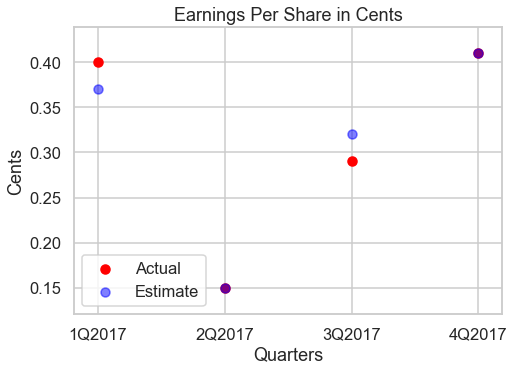

In [17]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

fig2 = plt.figure(figsize=(7.5,5.5))
plt.scatter(x_positions, earnings_actual, color='red')
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title("Earnings Per Share in Cents")
plt.xlabel('Quarters')
plt.ylabel('Cents')
fig2.tight_layout()
plt.show()


## Graph Literacy

+ What do the purple dots tell us about the actual and estimate earnings per share in this graph? Hint: In color theory red and blue mix to make purple.


#### What do the purple dots tell us about the actual and estimate earnings per share in this graph? ####
It tells us that actual and estimated earnings were equal.


## Step 7

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. We have visualized a similar chart in the second Matplotlib lesson [Exercise 4](https://www.codecademy.com/courses/learn-matplotlib/lessons/matplotlib-ii/exercises/side-by-side-bars).

As you may recall, plotting side-by-side bars in Matplotlib requires computing the width of each bar before hand. We have pasted the starter code for that exercise below. 

1. Fill in the `n`, `t`, `d`, `w` values for the revenue bars
2. Plot the revenue bars by calling `plt.bar()` with the newly computed `x_values` and the `revenue_by_quarter` data
3. Fill in the `n`, `t`, `d`, `w` values for the earnings bars
4. Plot the revenue bars by calling `plt.bar()` with the newly computed `x_values` and the `earnings_by_quarter` data
5. Create a legend for your bar chart with the `labels` provided
6. Add a descriptive title for your chart with `plt.title()`
7. Add labels to each quarter by assigning the position of the ticks through the code provided. Hint:  `plt.xticks(middle_x, quarter_labels)`
8. Be sure to show your plot!


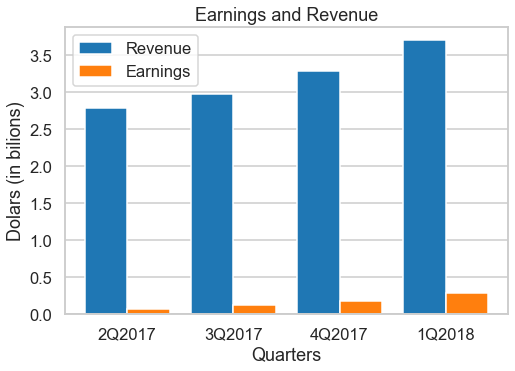

In [18]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

fig3 = plt.figure(figsize=(7.5,5.5))
# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = len(revenue_by_quarter) # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]

plt.bar(bars1_x, revenue_by_quarter)

# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = len(earnings_by_quarter) # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]

middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]

# Plotting
plt.bar(bars2_x, earnings_by_quarter)
labels = ["Revenue", "Earnings"]
plt.legend(["Revenue", "Earnings"])
plt.title("Earnings and Revenue")
plt.xlabel("Quarters")
plt.ylabel("Dolars (in bilions)")
plt.xticks(middle_x, quarter_labels)
plt.gca().xaxis.grid(False)
fig3.tight_layout()
plt.show()


## Graph Literacy
What are your first impressions looking at the visualized data?

- Does Revenue follow a trend?
- Do Earnings follow a trend?
- Roughly, what percentage of the revenue constitutes earnings?

In [19]:
#### Does Revenue follow a trend? ####
def trend(data_list):
    nested_def = lambda x,y: round(((y / x) - 1) * 100, 2) 
    res_list = []
    for i in range(len(data_list)-1):
        res_list.append(nested_def(data_list[i], data_list[i+1]))
    return res_list

def printing_trend(data_list, name):
    print()
    print('Trend {}'.format(name))
    for i in range(len(data_list)):
        if i == 0:
            q_name = '2nd and 3rd quarter of 2017:'
        if i == 1:
            q_name = '3rd and 4th quarter of 2017:'
        if i == 2:
            q_name = '4th of 2017 and 1st quarter of 2018:'
        print('Difference in {} between {} {} %'.format(name, q_name, data_list[i]))
        
def get_average(data_list):
    return round(sum(data_list) / len(data_list), 2)
    
    
revenue_trend = trend(revenue_by_quarter)
printing_trend(revenue_trend, 'revenue')
print('Revenue Mean Rate of Growth: {} %'.format(get_average(revenue_trend)))
print('Revenue is constantly growing each quarter. The rate of growth is increasing')



Trend revenue
Difference in revenue between 2nd and 3rd quarter of 2017: 6.81 %
Difference in revenue between 3rd and 4th quarter of 2017: 10.4 %
Difference in revenue between 4th of 2017 and 1st quarter of 2018: 12.46 %
Revenue Mean Rate of Growth: 9.89 %
Revenue is constantly growing each quarter. The rate of growth is increasing


In [20]:
#### Do Earnings follow a trend? ####
earnings_trend = trend(earnings_by_quarter)
printing_trend(earnings_trend, 'earnings')
print('Earnings Mean Rate of Growth: {} %'.format(get_average(earnings_trend)))
print("There was a massive increase between 2nd and 3rd quarter of 2017 when the earnings almost doubled.",
      "Rest of the examined quarters show slower but still rather impressive increase.")


Trend earnings
Difference in earnings between 2nd and 3rd quarter of 2017: 97.55 %
Difference in earnings between 3rd and 4th quarter of 2017: 43.16 %
Difference in earnings between 4th of 2017 and 1st quarter of 2018: 56.38 %
Earnings Mean Rate of Growth: 65.7 %
There was a massive increase between 2nd and 3rd quarter of 2017 when the earnings almost doubled. Rest of the examined quarters show slower but still rather impressive increase.


In [21]:
#### Roughly, what percentage of the revenue constitutes earnings? ####
res = [round(i / j * 100, 2) for i, j in zip(earnings_by_quarter, revenue_by_quarter)]
print()
print('What percentage of the revenue constitutes earnings?')
for i in range(len(res)):
    if i == 0:
        q_name = '1st and 2nd quarter of 2017:'
    if i == 1:
        q_name = '2nd and 3rd quarter of 2017:'
    if i == 2:
        q_name = '3nd and 4rd quarter of 2017:'
    if i == 3:
        q_name = '4th of 2017 and 1st quarter of 2018:'
    print('In {} earnings constitute {} % of revenue'.format(q_name, res[i]))
print('In average earnings constitute {} % of revenue'.format(get_average(res)))


What percentage of the revenue constitutes earnings?
In 1st and 2nd quarter of 2017: earnings constitute 2.35 % of revenue
In 2nd and 3rd quarter of 2017: earnings constitute 4.35 % of revenue
In 3nd and 4rd quarter of 2017: earnings constitute 5.64 % of revenue
In 4th of 2017 and 1st quarter of 2018: earnings constitute 7.84 % of revenue
In average earnings constitute 5.04 % of revenue


#### Does Revenue follow a trend? ####
Revenue is constantly growing each quarter. In average the rate of growth is increasing 9.89 % per quarter.

#### Do Earnings follow a trend? ####
There was a massive increase between 2nd and 3rd quarter of 2017 when the earnings almost doubled.
Rest of the examined quarters show slower but still rather impressive rate of growth.
In average the rate of growth is increasing 65.7 % per quarter.

#### Roughly, what percentage of the revenue constitutes earnings? ####
As stated above, earnings rate of growth widely surprase the revenue rate of growth.
Unsurprisingly, earnings constitute more and more percentage of revenue each year.
In average earnings constitute 5.04 % of revenue.

## Step 8

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 

Since `Price` which is the most relevant data is in the Y axis, let's map our subplots to align vertically side by side.
- We have set up the code for you on line 1 in the cell below. Complete the figure by passing the following arguments to `plt.subplots()` for the first plot, and tweaking the third argument for the second plot
    - `1`-- the number of rows for the subplots
    - `2` -- the number of columns for the subplots
    - `1` -- the subplot you are modifying

- Chart the Netflix Stock Prices in the left-hand subplot. Using your data frame, access the `Date` and `Price` charts as the x and y axes respectively. Hint: (`netflix_stocks['Date'], netflix_stocks['Price']`)
- Assign "Netflix" as a title to this subplot. Hint: `ax1.set_title()`
- For each subplot, `set_xlabel` to `"Date"` and `set_ylabel` to `"Stock Price"`
- Chart the Dow Jones Stock Prices in the left-hand subplot. Using your data frame, access the `Date` and `Price` charts as the x and y axes respectively. Hint: (`dowjones_stocks['Date'], dowjones_stocks['Price']`)
- Assign "Dow Jones" as a title to this subplot. Hint: `plt.set_title()`
- There is some crowding in the Y axis labels, add some space by calling `plt.subplots_adjust(wspace=.5)`
- Be sure to `.show()` your plots.


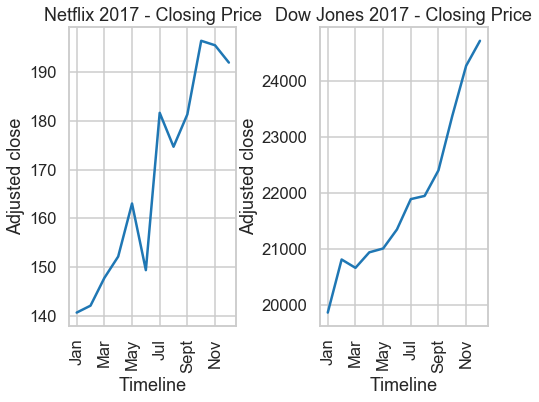

In [22]:
# Working with xticks
start = 0
step = 2
timedate = netflix_stocks.iloc[start:12:step, :]
Xticks = list(timedate['Date'])
Xticks_labels_origin = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
Xticks_labels = Xticks_labels_origin[start:12:step]

fig4 = plt.figure(figsize=(7.5,5.5))
# Left plot Netflix
ax1 = plt.subplot(1,2,1)
ax1.plot(netflix_stocks['Date'], netflix_stocks['Price'])
ax1.set_title("Netflix 2017 - Closing Price")
ax1.set_xticks(Xticks)
ax1.set_xticklabels(Xticks_labels)
ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel('Timeline')
ax1.set_ylabel('Adjusted close')

# Right plot Dow Jones
ax2 = plt.subplot(1,2,2)
ax2.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax2.set_xticks(Xticks)
ax2.set_xticklabels(Xticks_labels)
ax2.set_title("Dow Jones 2017 - Closing Price")
ax2.tick_params(axis='x', rotation=90)
ax2.set_xlabel('Timeline')
ax2.set_ylabel('Adjusted close')

fig4.subplots_adjust(wspace=.5)
plt.show()
fig4.tight_layout()



- How did Netflix perform relative to Dow Jones Industrial Average in 2017?
- Which was more volatile?
- How do the prices of the stocks compare?

In [23]:
#### How did Netflix perform relative to Dow Jones Industrial Average in 2017? ####
print('How did Netflix perform relative to Dow Jones Industrial Average in 2017?')
growth_def = lambda x,y: round(((y / x) - 1) * 100, 1) 
netflix_growth = growth_def(netflix_stocks['Price'].min(), netflix_stocks['Price'].max())
dowjones_growth = growth_def(dowjones_stocks['Price'].min(), dowjones_stocks['Price'].max())

print('In 2017, Netflix stock price grow {} %'.format(netflix_growth))
print('In 2017, Dowjones stock price grow {} %'.format(dowjones_growth))
print('As seen from the results, Netflix stocks were growing 15 % faster then Dowjones stocks')



How did Netflix perform relative to Dow Jones Industrial Average in 2017?
In 2017, Netflix stock price grow 39.6 %
In 2017, Dowjones stock price grow 24.4 %
As seen from the results, Netflix stocks were growing 15 % faster then Dowjones stocks


In [24]:
#### Which was more volatile? ####
print('Which was more volatile?')
'''In order to determine volatility, standard deviation calculation is performed.
Values in each datasets are scaled differently. Therefore, data normalization is performed at the first place'''

# Calculating mean for each dataset
mean_netflix = netflix_stocks['Price'].mean()
mean_dowjones = dowjones_stocks['Price'].mean()
min_netflix, max_netflix = netflix_stocks['Price'].min(), netflix_stocks['Price'].max()
min_dowjones, max_dowjones = dowjones_stocks['Price'].min(), dowjones_stocks['Price'].max()

# Normalizing data
netflix_stocks['Prices_normalized'] = netflix_stocks.Price.apply(lambda x: (x - min_netflix) / (max_netflix - min_netflix))
dowjones_stocks['Prices_normalized'] = dowjones_stocks.Price.apply(lambda x: (x - min_dowjones) / (max_dowjones - min_dowjones))

# Standard deviation
sdev_netflix = netflix_stocks['Price'].std()
sdev_dowjones = dowjones_stocks['Price'].std()
sdev_netflix_normalized = netflix_stocks['Prices_normalized'].std()
sdev_dowjones_normalized = dowjones_stocks['Prices_normalized'].std()

# Print results
print('Standard deviation of Netflix Adj price is ${} which is in percentage {} %'.format(round(sdev_netflix,2), round(sdev_netflix_normalized*100,2)))
print('Standard deviation of Dowjones Adj price is ${} which is in percentage {} %'.format(round(sdev_dowjones,2), round(sdev_dowjones_normalized*100,2)))
print('From the examination of standard deviation, it has been determined that netflix closing stock prices are more votalite.')


Which was more volatile?
Standard deviation of Netflix Adj price is $21.3 which is in percentage 38.22 %
Standard deviation of Dowjones Adj price is $1503.77 which is in percentage 30.97 %
From the examination of standard deviation, it has been determined that netflix closing stock prices are more votalite.


How do the prices of the stocks compare?
Adj prices in each file is vastly different. In order to make prices comparable, all prices are normalized
     Netflix  Dowjones
0   0.000000  0.000000
1   0.025485  0.195288
2   0.127423  0.164595
3   0.206209  0.221708
4   0.401292  0.235742
5   0.156138  0.305973
6   0.734925  0.417503
7   0.610194  0.429239
8   0.729361  0.523364
9   1.000000  0.723595
10  0.983489  0.907959
11  0.919778  1.000000
Months where Netflix growed faster then industry:
  months  % diff
0    May   41.25
1    Jul   43.19
2    Aug   29.66
3   Sept   28.24
4    Oct   27.64
5    Nov    7.68

Months where Netflix growed slower then industry:
  months  % diff
0    Feb  -86.95
1    Mar  -22.58
2    Apr   -6.99
3    Jun  -48.97
4    Dec   -8.02

Total number of months when Netflix growed faster than industry: 6


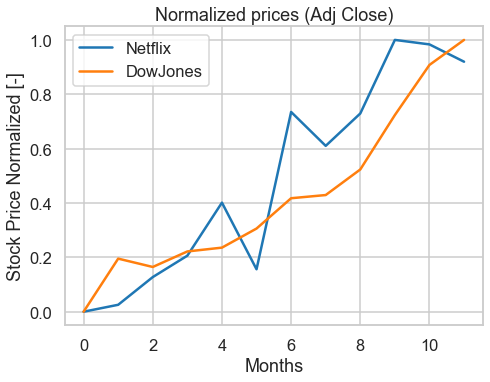

In [25]:
#### How do the prices of the stocks compare? ####
print('How do the prices of the stocks compare?')
print('Adj prices in each file is vastly different. In order to make prices comparable, all prices are normalized')
# Making new dataframe
price_compare = netflix_stocks[['Prices_normalized']].copy()
price_compare = price_compare.rename(columns={'Prices_normalized':'Netflix'})
price_compare['Dowjones'] = dowjones_stocks['Prices_normalized']
print(price_compare)
price_compare['months'] = Xticks_labels_origin
price_compare = price_compare.drop(0)

price_compare['% diff'] = price_compare.apply(lambda row:
                                            round(((row.Netflix / row.Dowjones) - 1) * 100, 2) 
                                            if row.Netflix < row.Dowjones 
                                            else round((1 - (row.Dowjones / row.Netflix)) * 100, 2), axis=1)

price_compare['Netflix_grow_faster'] = price_compare.apply(lambda row:
                                                    True if row.Netflix > row.Dowjones 
                                                    else False, axis=1)

num_months_netflix_grow_faster = price_compare.groupby('Netflix_grow_faster').months.count()
months_N_faster = price_compare[['months', '% diff']].loc[price_compare['Netflix_grow_faster'] == True].reset_index(drop=True)
months_D_faster = price_compare[['months', '% diff']].loc[price_compare['Netflix_grow_faster'] == False].reset_index(drop=True)


print('Months where Netflix growed faster then industry:')
print(months_N_faster)

print()
print('Months where Netflix growed slower then industry:')
print(months_D_faster)
print()
print('Total number of months when Netflix growed faster than industry: {}'.format(num_months_netflix_grow_faster[True]))

# Plot normalized prices - for ilustration
fig5 = plt.figure(figsize=(7.5,5.5))
plt.plot(netflix_stocks['Prices_normalized'])
plt.plot(dowjones_stocks['Prices_normalized'])
plt.xlabel('Months')
plt.ylabel('Stock Price Normalized [-]')
plt.title('Normalized prices (Adj Close)')
plt.legend(['Netflix','DowJones'])
plt.show()


# Step 9

It's time to make your presentation! Save each of your visualizations as a png file with `plt.savefig("filename.png")`.

As you prepare your slides, think about the answers to the graph literacy questions. Embed your observations in the narrative of your slideshow!

Remember that your slideshow must include:
- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017


In [26]:
fig1.savefig('figures\distributions.png')
fig2.savefig('figures\earnings_per_share.png')
fig3.savefig('figures\earnings_revenue.png')
fig4.savefig('figures\price_comapartion.png')
fig5.savefig('figures\price_normalized_comapartion.png')